 EDA & Ensemble Model (Top 10 Percentile)
* https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile


질문
- subplots에 displot을 그릴 방법은 없을까요?[link](#question2)
- subplots에 pandas plot으로 그렸는데, spine이 안없어지는제 어떻게하면 없앨 수 있을까요?[link](#question3)
-  windspeed가 0인 값을 대체 및 예측 모델 중 하나로 랜덤포레스트를 사용했던데,하이퍼파라미터 조정을 따로 안하는 이유가 있을까요?  
++또한, 랜덤포레스트는 자체적으로 교차검증을 하는 것으로 알고 있는데, seed를 지정해줄 필요는 없나요?[link](#question4)
- sklearn.metrics 중 mean_squared_log_error를 루트씌우면 RMSLE인데 직접 생성하시는 이유가 있나요??
- 모델 학습 시 값을 log1p 변환 후 rmsle 시 exp()변환을 하는데, 이때 발생하는 오차는 감안하고 진행하는 건가요?? [link](#question5)
- metrics.make_scorer의 하이퍼파라미터 중 greater_is_better는 무엇인가요..?

# import modules

In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats #stats : statistics
#SciPy('사이파이'라고 읽음)는 과학기술계산을 위한 Python 라이브러리이다.
#NumPy, Matplotlib, pandas, SymPy와 연계되어 있다(""특히 NumPy와""). 가능한 알고리즘과 관련 패키지는 다음과 같다
# https://wikidocs.net/15636
import missingno as msno
#결측치 확인 msno.matrix == sns.heatmap(df.isnull(), cbar = False)
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
# 사본 작업 시 소스 데이터에 영향을 미치지 않게 하기 = copy()
# pd.options.mode.chained_assignment = old_ca # restore

warnings.filterwarnings("ignore", category = DeprecationWarning)
%matplotlib inline

plt.style.use("seaborn-darkgrid")

# Data Summary

In [2]:
# read data
dailyData = pd.read_csv("./data/train.csv")

### shape of dataset

In [3]:
#shape of the dataset
rows, cols = dailyData.shape
print(f"num of rows : {rows}\nnum of cols : {cols}")

num of rows : 10886
num of cols : 12


### Sample Of First Few Rows

In [4]:
#sample of few rows
dailyData.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


### Sample of last few rows

In [5]:
#sample of few rows
dailyData.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


### Variables Date type

In [6]:
# variable Data Type
dailyData.info()
# dailyData.dtypes 노트에서 사용한 코드

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### describe variables

In [7]:
#기술통계량
dailyData.describe(include = "all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-11-14 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


# Feature Engineering

### creating new columns for visualization

In [8]:
#datetime으로 일자,시간 컬럼 생성
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()]) #ref. note 코드 130 ms ± 1.83 ms per loop
# dailyData["weekday"] = dailyData.date.apply(lambda x : calendar.day_name[pd.to_datetime(x).weekday()]) #내 코드 902 ms ± 15.2 ms per loop
dailyData["month"] = dailyData.date.apply(lambda x : calendar.month_name[datetime.strptime(x, "%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", 
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", 
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
dailyData.head(3) # ref.code에선 weather 생서 시 줄을 이어주기 위해 \를 표시했으나, 현 버전에선 불필요함

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January


In [9]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  hour        10886 non-null  object 
 14  weekday     10886 non-null  object 
 15  month       10886 non-null  object 
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


### Coercing To category Type

In [10]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

### Dropping uncessary Columns

In [11]:
dailyData = dailyData.drop("datetime",axis=1)

### Lets start with very simple visualization of variables data type count

In [12]:
DataType = dailyData.dtypes.value_counts().reset_index().rename(columns = {"index" : "varType", 0 : "count"})
DataType["varType"] = DataType["varType"].astype(str) #varType은 Dtype이므로 string으로 바꿔줘야 함

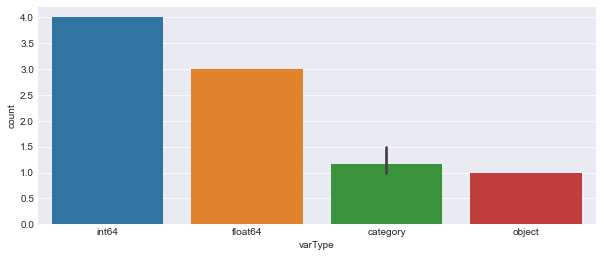

In [13]:
fig,ax = plt.subplots(1,1, figsize = (10,4))
sns.barplot(data = DataType, x = "varType", y = "count", ax = ax)
# ax.bar(data = DataType, x = "varType", height = "count")

 # Missing Value analysis

In [14]:
dailyData.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

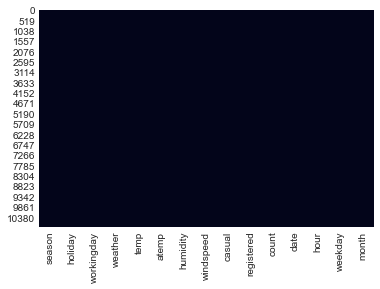

In [15]:
sns.heatmap(dailyData.isnull(),cbar = False)

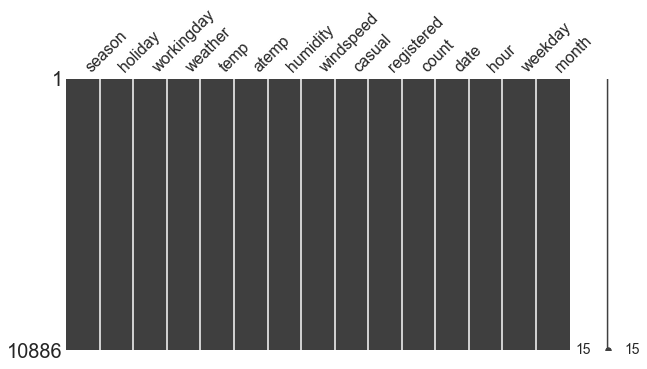

In [16]:
msno.matrix(dailyData, figsize = (10,5))

# Outliers Analysis

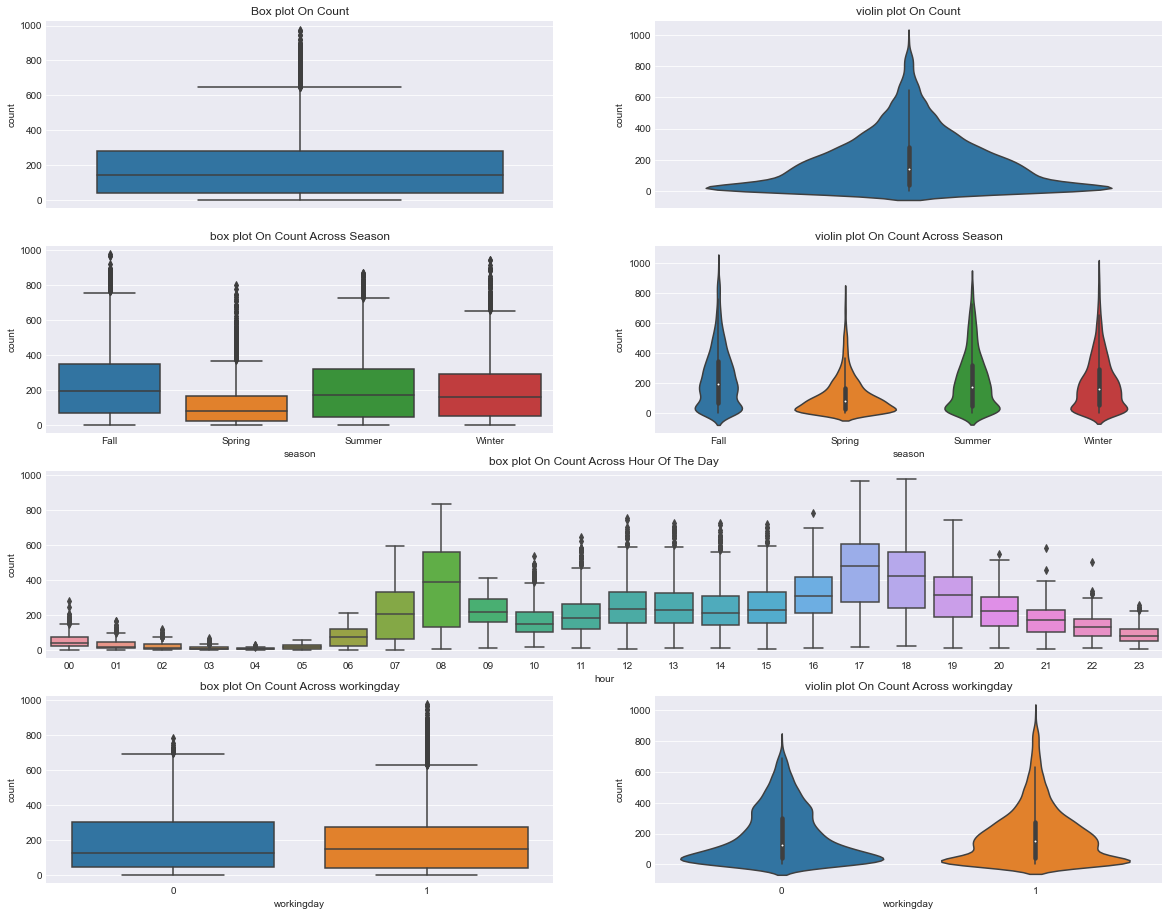

In [17]:
#방법 1
# fig, ax = plt.subplots(nrows=2,ncols=2, figsize = (12,10))
# sns.boxplot(data=dailyData,y="count",orient="v",ax=ax[0][0])
# sns.boxplot(data=dailyData,y="count",x="season",orient="v",ax=ax[0][1])
# sns.boxplot(data=dailyData,y="count",x="hour",orient="v",ax=ax[1][0])
# sns.boxplot(data=dailyData,y="count",x="workingday",orient="v",ax=ax[1][1])
# ax[0][0].set(ylabel='Count',title="Box Plot On Count")
# ax[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
# ax[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
# ax[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

#방법 2
plt.figure(figsize=(20,20))

plt.subplot(521)
sns.boxplot(data=dailyData,y = "count")
plt.title("Box plot On Count")


plt.subplot(522)
sns.violinplot(data=dailyData,y = "count")
plt.title("violin plot On Count")

plt.subplot(523)
sns.boxplot(data=dailyData, x = "season", y = "count")
plt.title("box plot On Count Across Season")

plt.subplot(524)
sns.violinplot(data=dailyData, x = "season", y = "count")
plt.title("violin plot On Count Across Season")

plt.subplot(513)
sns.boxplot(data=dailyData, x = "hour", y = "count")
plt.title("box plot On Count Across Hour Of The Day")

# plt.subplot(514)
# sns.violinplot(data=dailyData, x = "hour", y = "count")
# plt.title("violin plot On Count Across Hour Of The Day")

plt.subplot(527)
sns.boxplot(data=dailyData, x = "workingday", y = "count")
plt.title("box plot On Count Across workingday")

plt.subplot(5,2,8)
sns.violinplot(data=dailyData, x = "workingday", y = "count")
plt.title("violin plot On Count Across workingday")

##방법 3
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(18, 4)

# sns.barplot(data=train, x="year", y="count", ax=ax1)
# sns.barplot(data=train, x="month", y="count", ax=ax2)

# fig, ax3 = plt.subplots(nrows=1, ncols=1)
# fig.set_size_inches(18, 4)

# sns.barplot(data=train, x="year_month", y="count", ax=ax3)

plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [18]:
#95% 신뢰구간을 벗어나는 경우 outlier로 판단하여 제거
dailyDataWithoutOutliers = dailyData[np.abs(dailyData['count']-dailyData['count'].mean())<=(3*dailyData["count"].std())]

In [19]:
print("Shape of the before outliers :", dailyData.shape)
print("Shape of the after outliers : ", dailyDataWithoutOutliers.shape)
print(f"num of outliers : {len(dailyData)-len(dailyDataWithoutOutliers)}")

Shape of the before outliers : (10886, 15)
Shape of the after outliers :  (10739, 15)
num of outliers : 147


# Correlation Analysis

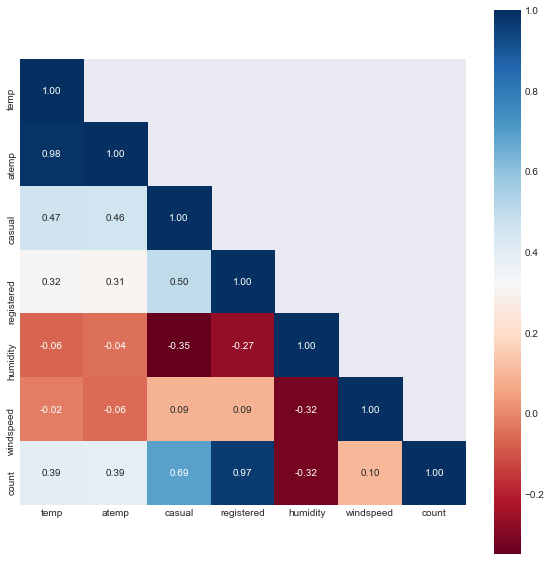

In [20]:
corrMatt = dailyData[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
# np.tril_indices_from() : Return the indices for the lower-triangle of arr.

plt.figure(figsize = (10,10))
sns.heatmap(corrMatt, mask = mask, annot = True, square = True, fmt = '.2f', cmap = 'RdBu')

- 온도와 습도는 약한 양의 상관계수를 가지는 것으로 보아 온도와 습도는 횟수와 거의 연관성이 없다고 보인다.
- 풍속은 유용한 데이터가 아닌 것으로 보인다
- 온도는 약한 양의 상관관게지만, 온도와 체온의 상관관계가 높으므로 다중공산성 문제가 발생할 수 있으므로 둘 중 하나를 삭제해야 한다.
- casual과 registered는 testset에 없는 컬럼이므로 삭제해야 한다.

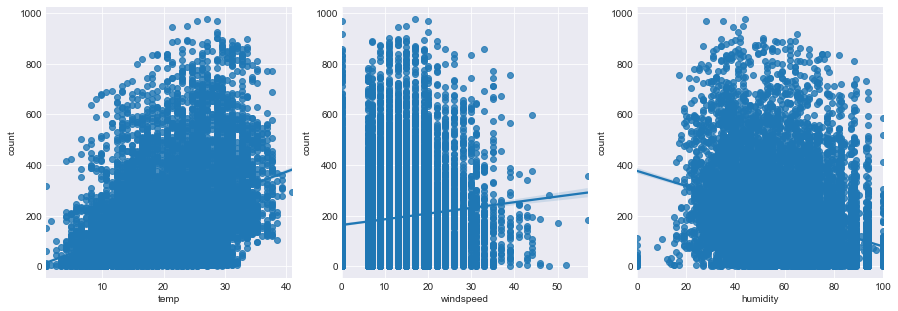

In [21]:
fig,ax = plt.subplots(1,3, figsize = (15,5))
sns.regplot(data = dailyData, x = "temp", y = "count", ax = ax[0])
sns.regplot(data = dailyData, x = "windspeed", y = "count", ax = ax[1])
sns.regplot(data = dailyData, x = "humidity", y = "count", ax = ax[2])

# Visualizing Distribution Of Data

## Skewness & Kurtosis of count in Distribution

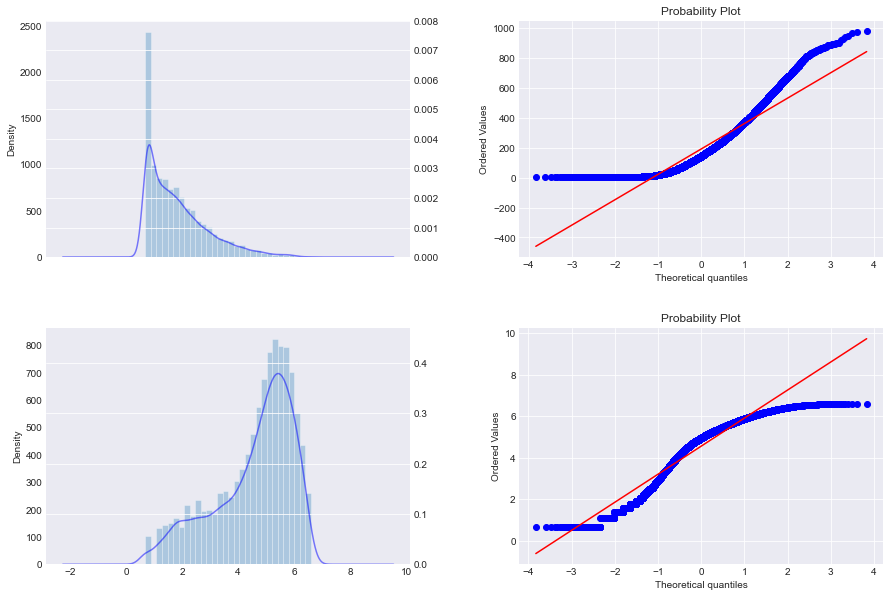

기준 : skewness  < |1|, qurtosis < 7
Skewness : 1.2421 => 왜도 절대값이 1보다 크고 양수이므로 왼쪽으로 치우침
kurtosis : 1.3001 => 7보다 작으므로 정상분포
Skewness_log1p : 0.7072 => 어느 정도 우측으로 치우쳐있지만, 왜도가 1미만임을 확인
kurtosis_log1p : 0.4234 => 7보다 작으므로 정상분포


In [22]:
fig, ax = plt.subplots(2,2, figsize = (15,10))

#matplotplib에는 kde plot이 없음##
dailyData["count"].plot.hist(bins =30, alpha = 0.3, edgecolor="white",ax = ax[0][0])
dailyData["count"].plot.kde(alpha = 0.5, secondary_y="count", color = "Blue",ax = ax[0][0])
ax[0][0].right_ax.set_ylim(0,0.008)
# ax[0][0].set_title("")
stats.probplot(dailyData["count"], dist='norm', fit=True, plot = ax[0][1])

np.log1p(dailyDataWithoutOutliers["count"]).plot.hist(bins = 30, alpha=0.3, edgecolor = "white", ax = ax[1][0])
np.log1p(dailyDataWithoutOutliers["count"]).plot.kde(alpha=0.5,secondary_y="count", color = "Blue", ax = ax[1][0])
ax[1][0].right_ax.set_ylim(0,0.47)
stats.probplot(np.log1p(dailyDataWithoutOutliers["count"]), dist='norm', fit=True, plot = ax[1][1])
#np.log1p : 밑이 e인 log로 값이 0이하일 경우 0으로 반환

plt.subplots_adjust(wspace=0.3, hspace = 0.3) #subplot간 간격 조정
# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
plt.show()

print("기준 : skewness  < |1|, qurtosis < 7")
print(f"Skewness : {dailyData['count'].skew():.4f} => 왜도 절대값이 1보다 크고 양수이므로 왼쪽으로 치우침")
print(f"kurtosis : {dailyData['count'].kurt():.4f} => 7보다 작으므로 정상분포")

print(f"Skewness_log1p : {np.log1p(dailyDataWithoutOutliers['count'].skew()):.4f} => 어느 정도 우측으로 치우쳐있지만, 왜도가 1미만임을 확인")
print(f"kurtosis_log1p : {dailyDataWithoutOutliers['count'].kurt():.4f} => 7보다 작으므로 정상분포")

질문 2 subplots에 displot을 그릴 방법은 없을까요?
<a id="question2"></a>

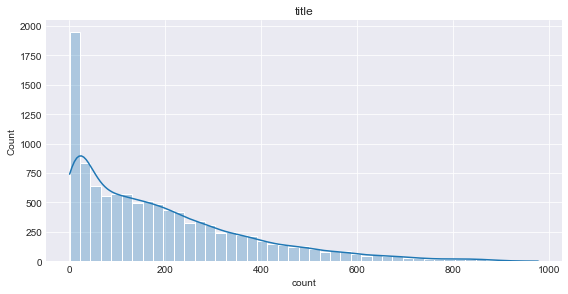

In [23]:
g = sns.displot(dailyData["count"], kde = True, alpha = 0.3,edgecolor="White", height = 4, aspect = 2,)
#displot은 facetfrid를 생성하여, matlplotlib이 생성하는 figure와 axes를 포함하는 객체
#따라서 matplot이 subplot으로 생성하는 axes에는 담을 수 없음
#displot은 pyplot 방식으로 사용해야 하므로, height 와 aspect로 크기 조절
g.set(title = "title")
# fig,ax = plt.subplots(1,1,figsize = (10,4))
# ax.hist(dailyData["count"], bins = 30, edgecolor = "white", alpha = 0.3, density = True)
# plt.show()

질문 3 : 아래 코드에서 ax.spines["top"].set_visible(False)로 상부 테두리 없애고 싶습니다.
<a id='question3'></a>

Text(0.5, 1.0, 'skewness')

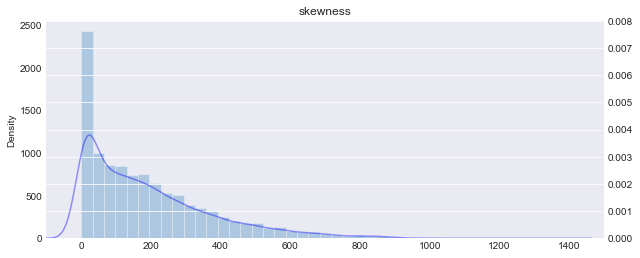

In [24]:
# 여러 그래프를 그리고자 할 경우, plt로 subplot을 생성 후 pandas의 plot으로 밀도함수 그리면 됨
fig,ax = plt.subplots(1,1,figsize = (10,4))
dailyData["count"].plot.hist(bins = 30, edgecolor = "white", alpha = 0.3, ax=ax)
dailyData["count"].plot.kde(secondary_y = "count", color = "Blue",alpha = 0.4,ax = ax)
ax.right_ax.set_ylim(0,0.008)
ax.set_xlim(-100,1500)

#상부 테두리 없애는 방법..
ax.spines["top"].set_visible(False)

plt.title("skewness")

# Visualizing Count Vs (Month, Season, Hour, Weekday, Usertype)

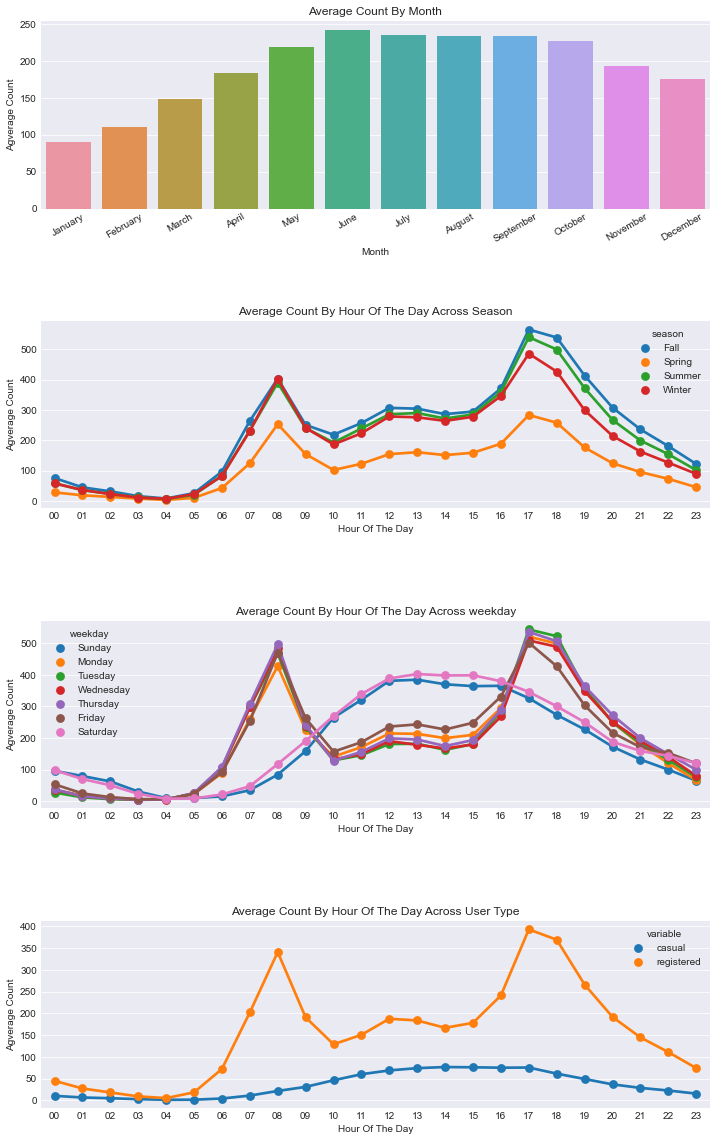

In [25]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (12,20))

sort_month = dailyData.month.unique().tolist()
sort_weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']

month_mean = dailyData.groupby(["month"])["count"].mean().reset_index()
sns.barplot(data = month_mean, x = "month", y = "count", order = sort_month, ax = ax1)
ax1.set(xlabel = "Month", ylabel = "Agverage Count", title = "Average Count By Month")
ax1.set_xticklabels(sort_month, rotation = 30)

hour_mean = dailyData.groupby(["hour","season"])["count"].mean().reset_index()
sns.pointplot(data = hour_mean, x = "hour", y = "count", hue = "season", ax = ax2)
ax2.set(xlabel = "Hour Of The Day", ylabel = "Agverage Count", title = "Average Count By Hour Of The Day Across Season")

hour_mean = dailyData.groupby(["hour","weekday"])["count"].mean().reset_index()
sns.pointplot(data = hour_mean, x = "hour", y = "count", hue = "weekday", hue_order = sort_weekday, ax = ax3)
ax3.set(xlabel = "Hour Of The Day", ylabel = "Agverage Count", title = "Average Count By Hour Of The Day Across weekday")
# hour_mean = 
hour_transfomred = pd.melt(dailyData[["hour","casual","registered"]],id_vars = "hour", value_vars = ["casual","registered"])
hour_transfomred_mean=hour_transfomred.groupby(["hour","variable"])["value"].mean().reset_index()
sns.pointplot(data = hour_transfomred_mean, x = "hour", y = "value", hue = "variable", ax = ax4)
ax4.set(xlabel = "Hour Of The Day", ylabel = "Agverage Count", title = "Average Count By Hour Of The Day Across User Type")

plt.subplots_adjust(hspace = 0.6)

# Filling 0's in windspeed using random forest

**Lets Read In Train And Test Data**

In [26]:
trainset = pd.read_csv("./data/train.csv")
testset = pd.read_csv("./data/test.csv")

**Combine Train And Test**

In [27]:
data = trainset.append(testset)
data = data.reset_index()
data = data.drop("index",axis = 1)

**Feature Engineering**

In [28]:
# data["date"] = data.datetime.apply(lambda x : x.split()[0])
# data["hour"] = data.datetime.apply(lambda x : x.split()[1][:2])
# data["year"]=data.date.apply(lambda x : x.split('-')[0])
# data["weekday"]=data.date.apply(lambda x :pd.to_datetime(x).weekday())
# data["month"]=data.datetime.apply(lambda x : pd.to_datetime(x).month)

data["datetime"]=data.datetime.apply(lambda x : pd.to_datetime(x))
data["hour"] = data.datetime.dt.hour
data["year"] = data.datetime.dt.year
data["weekday"] = data.datetime.dt.weekday
data["month"] = data.datetime.dt.month

**Random Forest Model To Predict 0's In Windspeed**
<a id="ch91"></a>
 * Compare RandomForest models in R and in Python. It seems there is some difference in model results
 * https://github.com/scikit-learn/scikit-learn/issues/6086
 
 
 -  windspeed가 0인 값을 대체하기 위해 랜덤포레스트를 사용했던데,하이퍼파라미터 조정을 따로 안하는 이유가 있을까요?
 - 또한, 랜덤포레스트는 자체적으로 교차검증을 하는 것으로 알고 있는데, seed를 지정해줄 필요는 없나요?
 <a id="question4"></a>

In [29]:
from sklearn.ensemble import RandomForestRegressor

Wind0 = data[data.windspeed==0]
WindNot0 = data[data.windspeed!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
np.random.seed(1234)
rfModel_wind.fit(WindNot0[windColumns], WindNot0["windspeed"])

wind0_values = rfModel_wind.predict(X = Wind0[windColumns])
Wind0["windspeed"] = wind0_values
data = Wind0.append(WindNot0)
data = data.reset_index().drop("index",axis = 1)

**Coercing To Categorical Type**

In [30]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","registered"]

In [31]:
for var in categoricalFeatureNames:
    data[var]= data[var].astype("category")

**Splitting and dropping Train And Test Data**

In [32]:
train = data[~data.casual.isnull()].sort_values(by="datetime")
test = data[data.casual.isnull()].sort_values(by="datetime")

datetime_col = test["datetime"]
train_y_count = train["count"]
train_y_registered = train["registered"]
train_y_casual = train["casual"]

train = train.drop(dropFeatures,axis=1)
test = test.drop(dropFeatures,axis=1)
print(f"data_rows : {len(data)} / train_rows : {len(train)} / test_rows : {len(test)}")

data_rows : 17379 / train_rows : 10886 / test_rows : 6493


**RMSLE Score**
https://ahnjg.tistory.com/90  
**sklearn.metrics**https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [33]:
from sklearn.metrics import mean_squared_log_error, make_scorer
def rmsle(true, pred, convertExp=True):
    true = np.exp(true)
    pred = np.exp(pred)
    calc = mean_squared_log_error(y_true = true,y_pred = pred)
    return np.sqrt(calc)

#노트 상 코드
# def rmsle(y, y_,convertExp=True):
#     if convertExp:
#         y = np.exp(y),
#         y_ = np.exp(y_)
#     log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
#     log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
#     calc = (log1 - log2) ** 2
#     return np.sqrt(np.mean(calc))

# Linear Regression Model
- 모델 학습 시 값을 log1p 변환 후 rmsle 시 exp()변환을 하는데, 이때 발생하는 오차는 감안하고 진행하는 건가요??  
<a id="question5"></a>

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialize logistic regression model
lModel = LinearRegression()

#Train the model
train_y_log = np.log1p(train_y_count)
lModel.fit(X = train, y= train_y_log)

#Make predictions
preds = lModel.predict(X = train)
print("RMSLE Value For Linear Regression : ",rmsle(pred = preds, true = train_y_log))


RMSLE Value For Linear Regression :  0.9779673989114557


# Regulation Model - Ridge Regression(L1)
ridge, lasso 참고 : https://brunch.co.kr/@itschloe1/11

{'alpha': 1000, 'max_iter': 3000}
RMSLE Value For Ridge Regression :  0.9795970718306803


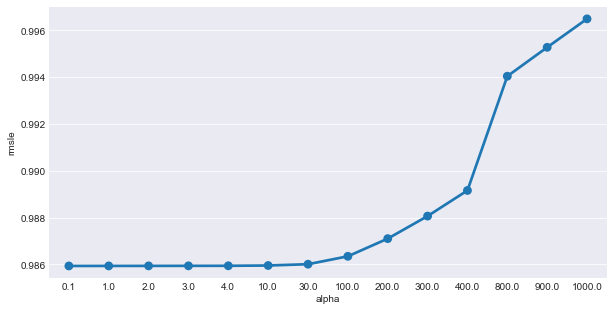

In [36]:
ridge_m = Ridge()
ridge_params = {'max_iter' : [3000],
                'alpha' : [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = True)
grid_ridge_m = GridSearchCV(estimator = ridge_m,
                            param_grid = ridge_params,
                            scoring = rmsle_scorer,
                            cv = 5)
train_y_log = np.log1p(train_y_count)
grid_ridge_m.fit(train, train_y_log)
preds = grid_ridge_m.predict(X= train)
print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression : ",rmsle(pred = preds, true = train_y_log))


fig, ax = plt.subplots(1,1,figsize = (10,5))
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x : x["alpha"])
df["rmsle"] = df["mean_test_score"]
sns.pointplot(data = df, x = "alpha", y = "rmsle", ax = ax)

# Regulation Model - Lasso Regression(L2)

{'alpha': 10.0, 'max_iter': 3000}
RMSLE Value For Ridge Regression :  1.3685347667927898


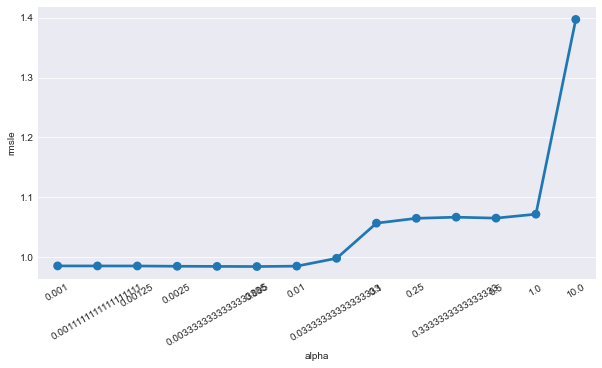

In [38]:
lasso_m = Lasso()

alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params = {'max_iter':[3000], 'alpha':alpha}

grid_lasso_m = GridSearchCV(estimator = lasso_m,
                            param_grid = lasso_params,
                            scoring = rmsle_scorer,
                            cv = 5)
train_y_log = np.log1p(train_y_count)
grid_lasso_m.fit(train, train_y_log)
preds = grid_lasso_m.predict(X = train)
print(grid_lasso_m.best_params_)
print("RMSLE Value For Ridge Regression : ",rmsle(pred = preds, true =train_y_log))
# print("RMSLE Value For Linear Regression : ",rmsle(y = np.exp(preds), y_ = np.exp(train_y_log), convertExp = False))

fig, ax = plt.subplots(1,1,figsize = (10,5))
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x : x["alpha"])
df["rmsle"] = df["mean_test_score"]
g = sns.pointplot(data = df, x = "alpha", y = "rmsle", ax = ax)
g.set_xticklabels(labels = df["alpha"].sort_values(), rotation=30)
plt.show()

# Ensemble Model - Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators = 100)
train_y_log = np.log1p(train_y_count)
rfModel.fit(train, train_y_log)
preds = rfModel.predict(train)
print("RMSLE Value For Random Forest : ",rmsle(pred = preds, true =train_y_log))

RMSLE Value For Random Forest :  0.10325261239212892


# Ensemble Model - Gradient Boost

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01)
train_y_log = np.log1p(train_y_count)
gbm.fit(train,train_y_log)
preds = gbm.predict(train)
print("RMSLE Value For Gradient Boost : ",rmsle(pred = preds, true =train_y_log))

RMSLE Value For Gradient Boost :  0.18941926190077485


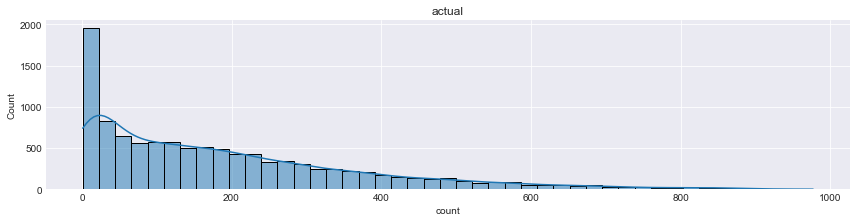

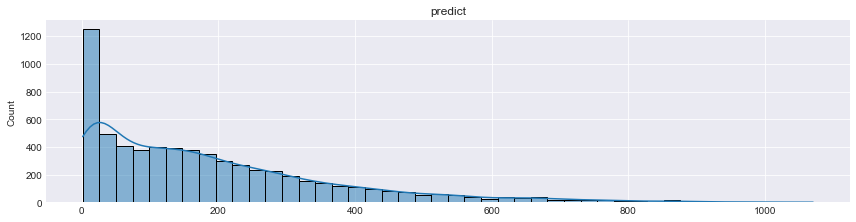

In [41]:
predsTest = gbm.predict(X= test)
g1 = sns.displot(train_y_count,kde=True, height = 3, aspect = 4)
g2 = sns.displot(np.exp(predsTest),kde=True,height = 3, aspect = 4)

g1.set(title = "actual")
g2.set(title = "predict")